In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

from deep_continuation.dataset import DATAPATH

The datasets studied here were obtained witht the following commands:

    python3 deep_continuation/dataset.py --save 10000 --seed 555;
    python3 deep_continuation/dataset.py --save 10000 --seed 555 --rescale 8.86;
    python3 deep_continuation/dataset.py --save 10000 --seed 555 --rescale 8.86 --spurious;

In [2]:
pi = {}
pi['no_rescale'] = np.load(os.path.join(DATAPATH,"Pi_B1_10000_seed555_128_beta30.npy"))
pi['rescale'   ] = np.load(os.path.join(DATAPATH,"Pi_B1_10000_seed555_128_beta30_rescaled8.86.npy"))

sigma = {}
sigma['no_rescale'] = np.load(os.path.join(DATAPATH,"sigma_B1_10000_seed555_512_wmax20.npy"))
sigma['rescale'   ] = np.load(os.path.join(DATAPATH,"sigma_B1_10000_seed555_512_wmax20_rescaled8.86.npy"))


Here are the difference in statistics

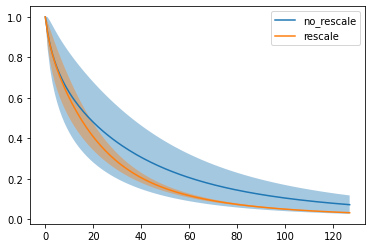

In [3]:
x = range(128)
for key, dataset in pi.items():
    avg = dataset.mean(axis=0)
    std = dataset.std(axis=0)
    
    plt.plot(avg, label=key)
    plt.fill_between(x, avg-std, avg+std, alpha=0.4)
plt.legend()
plt.show()

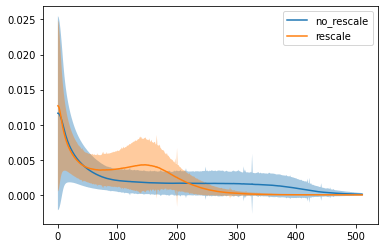

In [4]:
x = range(512)
for key, dataset in sigma.items():
    avg = dataset.mean(axis=0)
    std = dataset.std(axis=0)
    
    plt.plot(avg, label=key)
    plt.fill_between(x, avg-std, avg+std, alpha=0.4)
plt.legend()
plt.show()

Attempt to substract a baseline

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


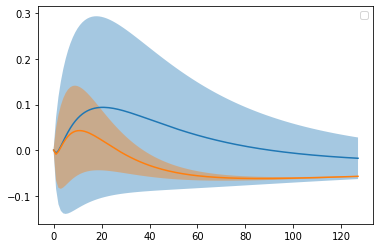

In [5]:
x = np.arange(128)
f = lambda y: y - 1/(x/(120*np.pi/30)+1) 

for key, dataset in pi.items():
    avg = dataset.mean(axis=0)
    std = dataset.std(axis=0)
    
    plt.plot(x, f(avg))
    plt.fill_between(x, f(avg-std), f(avg+std), alpha=0.4)
plt.legend()
plt.show()
